<a href="https://colab.research.google.com/github/brenoslivio/SCC0652_Computational_Visualization/blob/master/C%C3%B3pia_de_Projeto_2_Visualizacao_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 2 - Visualização de dados



<br>


**SCC0652 - Visualização Computacional (2020/2)**

<br>

[Projeto no GitHub](https://github.com/brenoslivio/SCC0652_Computational_Visualization)

<br>

**Alunos:**

Afonso Henrique Piacentini Garcia, Nº USP: 9795272

Breno Lívio Silva de Almeida, Nº USP: 10276675

Vitor Henrique Gratiere Torres, Nº USP: 10284952

---

## Sumário


1. [Descrição](#descricao)

  1.1 [dfPokemon.csv](#pokemoncsv)

  1.2 [Visualizações](#visual)

2. [Desenvolvimento](#desenvolvimento)

  2.1 [Carregando os dados](#dados)

  2.2 [Cores das visualizações](#cores)

  2.3 [Visualizando os dados](#visual)

    * [Outliers](#outliers)

    * [Correlações](#corr)

    * [Distribuição](#dist)

    * [Wordcloud](#wordcloud)

  2.4 [Conclusão das visualizações feitas](#conclusao)



## Descrição <a name="descricao"></a>

Essa parte do projeto da disciplina consiste na visualização de um conjunto de dados, um dataset, que no Projeto 1 foi previamente processado e analisado alguns itens foram considerados relevantes para o desenvolvimento do projeto. Lembrando que o conjunto de dados escolhido foi o de [Pokémons](https://www.pokemon.com/br/), do vídeo-game homônimo. Vamos usar o arquivo gerado do projeto anterior para o desenvolvimento dessa parte e possivelmente da seguinte.

### [dfPokemon.csv](https://github.com/brenoslivio/SCC0652_Computational_Visualization/blob/master/notebooks/Project-2/dfPokemon.csv) <a name="pokemoncsv"></a>

*   cod: O número do pokémon na Pokédex;
*   name: O nome do pokémon;
*   generation: a qual geração o pokémon em questão pertence;
*   status: refere-se a raridade do pokémon, variando de normal até mítico;
*   species: apelido dado para cada pokémon baseado em algum de seus atributos;
*   form: discriminante de mega evoluções e outras formas;
*   type1: tipo do pokémon;
*   type2: segundo tipo do pokémon, caso possua.
*   height_m: altura do pokémon em metros;
*   weight_kg: peso do pokémon em kilogramas.
*   total: soma total dos stats do pokémon;
*   hp: stat que indica a vida base do pokémon;
*   attack: stat que indica o poder de ataque fisico base do pokémon;
*   defense: stat que indica a defesa física base do pokémon;
*   spatk: stat que indica o poder de ataque especial do pokémon;
*   spdef: stat que indica o poder de defesa especial do pokémon;
*   speed: stat que indica a velocidade base do pokémon;
*   img: link para a imagem do pokémon;




## Desenvolvimento <a name="desenvolvimento"></a>

Vamos visualizar os dados tendo em mente sua composição total e inferir conclusões acerca das visualizações feitas.

### Carregando os dados <a name="dados"></a>

Agora vamos carregar os dados gerados no projeto anterior. Vamos ler o csv já indicando o tipo de cada variável para o data frame em questão. O data frame será usado ao decorrer desse projeto para a visualização adequada.



In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

import plotly.offline as ploff
import plotly.graph_objects as go
from plotly.subplots import make_subplots


ploff.init_notebook_mode(connected=True)

In [3]:
dfPokemon = pd.read_csv(
    "https://raw.githubusercontent.com/brenoslivio/SCC0652_Computationa"
    + "l_Visualization/master/notebooks/Project-2/dfPokemon.csv",
    dtype={
        "cod": str,
        "name": str,
        "generation": np.int32,
        "status": str,
        "species": str,
        "form": str,
        "type1": str,
        "type2": str,
        "height_m": np.float64,
        "weight_kg": np.float64,
        "total": np.int32,
        "hp": np.int32,
        "attack": np.int32,
        "defense": np.int32,
        "spatk": np.int32,
        "spdef": np.int32,
        "speed": np.int32,
        "img": str,
    },
    na_values="",
)

dfPokemon.sample(5)

,cod,name,generation,status,species,form,type1,type2,height_m,weight_kg,total,hp,attack,defense,spatk,spdef,speed,img
604,513,Pansear,5,Normal,High Temp Pokémon,NaN,Fire,NaN,0.6,11.0,316,50,53,48,53,48,64,https://img.pokemondb.net/sprites/home/normal/...
806,697,Tyrantrum,6,Normal,Despot Pokémon,NaN,Rock,Dragon,2.5,270.0,521,82,121,119,69,59,71,https://img.pokemondb.net/sprites/home/normal/...
325,273,Seedot,3,Normal,Acorn Pokémon,NaN,Grass,NaN,0.5,4.0,220,40,40,50,30,30,30,https://img.pokemondb.net/sprites/home/normal/...
336,283,Surskit,3,Normal,Pond Skater Pokémon,NaN,Bug,Water,0.5,1.7,269,40,30,32,50,52,65,https://img.pokemondb.net/sprites/home/normal/...
935,805,Stakataka,7,Sub Legendary,Rampart Pokémon,NaN,Rock,Steel,5.5,820.0,570,61,131,211,53,101,13,https://img.pokemondb.net/sprites/home/normal/...


### Cores das visualizações <a name="cores"></a>

Antes de propriamente visualizar os dados é importante ressaltar a escolha de uma palheta adequada de cores. Na biblioteca do Seaborn temos diversas [opções de palhetas de cores](https://seaborn.pydata.org/tutorial/color_palettes.html). Vamos escolher trabalhar com a opção "colorblind" para tentar tornar as visualizações mais acessíveis.

Entretanto, algumas situações específicas como as cores dos tipos dos Pokémons e a Pokébola feita em Word cloud seguirão os padrões esperados da franquia de vídeogame. Algumas cores em questão servem para tornar a visualização mais fiel com o conjunto de dados.

Exemplo de palheta padrão

In [4]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

Exemplo de palheta colorblind

In [5]:
sns.set_palette("colorblind")
sns.color_palette()

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

Definiremos também um dicionário que assimila os tipos dos pokemons com as suas cores.

In [6]:
colorsType = {
    "Bug": "#a6b91a",
    "Dark": "#705746",
    "Dragon": "#6f35fc",
    "Electric": "#f7d02c",
    "Fairy": "#d685ad",
    "Fighting": "#c22e28",
    "Fire": "#ee8130",
    "Flying": "#a98ff3",
    "Ghost": "#735797",
    "Grass": "#7ac74c",
    "Ground": "#e2bf65",
    "Ice": "#96d9d6",
    "Normal": "#a8a77a",
    "Poison": "#a33ea1",
    "Psychic": "#f95587",
    "Rock": "#b6a136",
    "Steel": "#b7b7ce",
    "Water": "#6390f0",
}
cinza = "#808080"
transparente = "rgba(0,0,0,0)"

### Visualizando os dados <a name="visual"></a>

A ideia da visualização de dados é muito importante para possibilitar uma identificação mais rápida e precisa sobre informações relevantes de um conjunto de dados, fazendo com que até mesmo leigos sobre um assunto possam pelo menos ter uma breve noção do comportamento dos dados em questão. Para isso precisamos fazer visualizações realmente pensadas e justificadas com base no tipo de dados que estamos lidando.

Essa seção irá servir não somente para mostrar algumas informações interessantes (como outliers, relações, entre outros) por meio de vários tipos de visualizações, mas também para justificar o uso destas. 

Vale lembrar que estamos lidando com um dataset híbrido, contendo diversas categorias como `generation`, `status` e `type1`, e também contendo diversas variáveis numéricas como `height_m`, `weight_kg`, `total`, `hp`, `attack`, `defense`, entre outros. O catálogo [From Data to Viz](https://www.data-to-viz.com/) nos mostra diversas visualizações que podemos fazer com base nesse conjunto de dados híbrido.

#### Outliers <a name="outliers"></a>

Podemos encontrar Outliers por meio de diferentes tipos de visualizações

generation
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
7    AxesSubplot(0.125,0.125;0.775x0.755)
8    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total, dtype: object

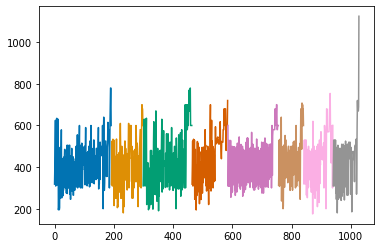

In [7]:
dfPokemon.groupby("generation")["total"].plot()

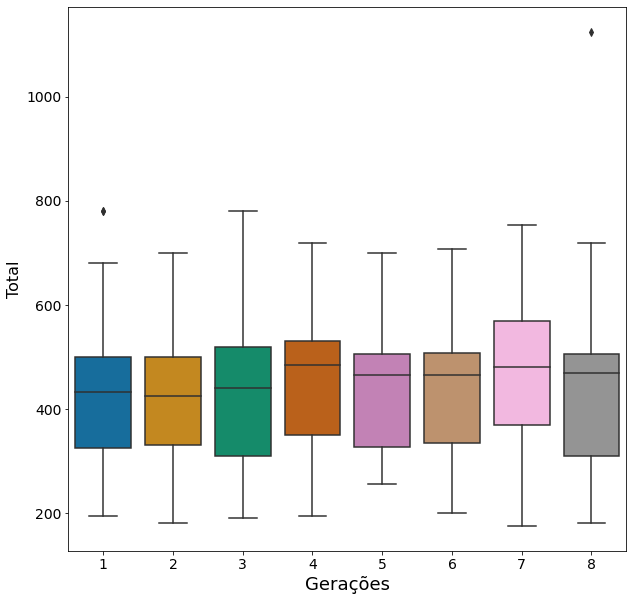

In [8]:
plt.figure(figsize=(10, 10))
sns.boxplot(x="generation", y="total", data=dfPokemon)
plt.xlabel("Gerações", fontsize=18)
plt.ylabel("Total", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

#### Correlações <a name="corr"></a>

Encontrar correlações em um conjunto de dados pode ser sempre interessante para descobrir algumas possíveis ligações entre variáveis que não eram exatamente esperadas. Vamos visualizar essas correlações por meio de Heatmaps, usando as conhecidas correlações de Pearson e Spearman.

Antes de tudo, é aconselhável a [normalização dos dados](https://python-graph-gallery.com/94-use-normalization-on-seaborn-heatmap/) para se fazer visualizações com Heatmap. Entretanto, como apenas queremos fazer Heatmaps para ver as correlações de Pearson e Spearman, sendo estas já normalizadas de definição, podemos fazer diretamente sem perda de dados.


Correlação de Pearson


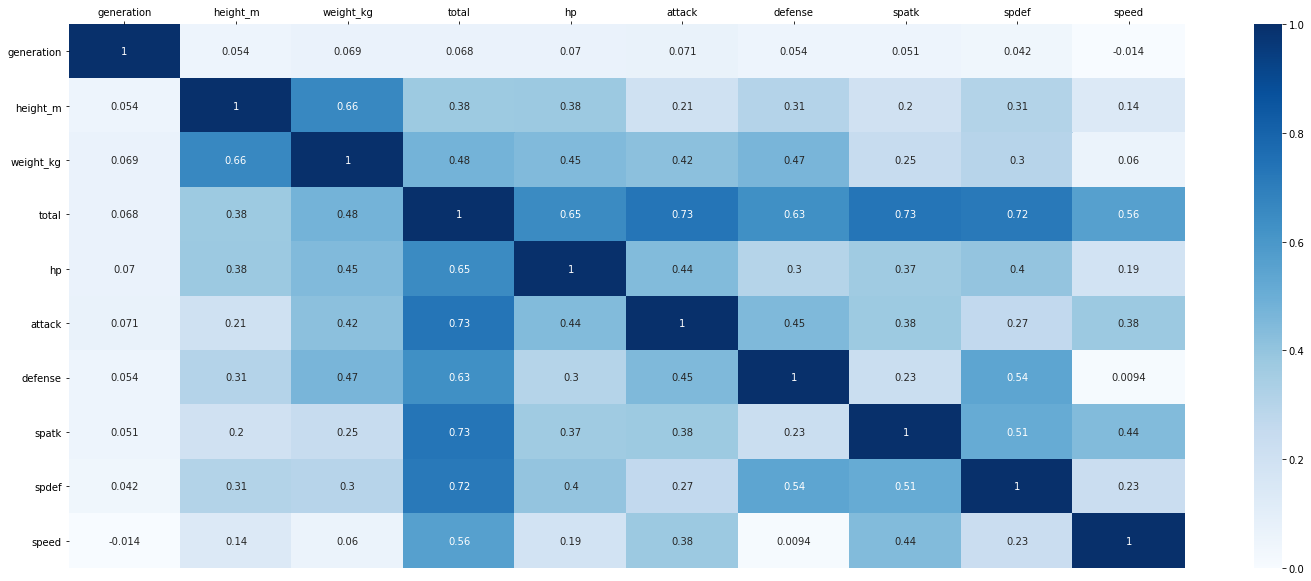

In [9]:
corrmat = dfPokemon.corr(method="pearson")
plt.figure(figsize=(25, 10))
sns.heatmap(
    corrmat, vmax=1, vmin=0, annot=True, cmap="Blues"
).xaxis.tick_top()

Correlação de Spearman

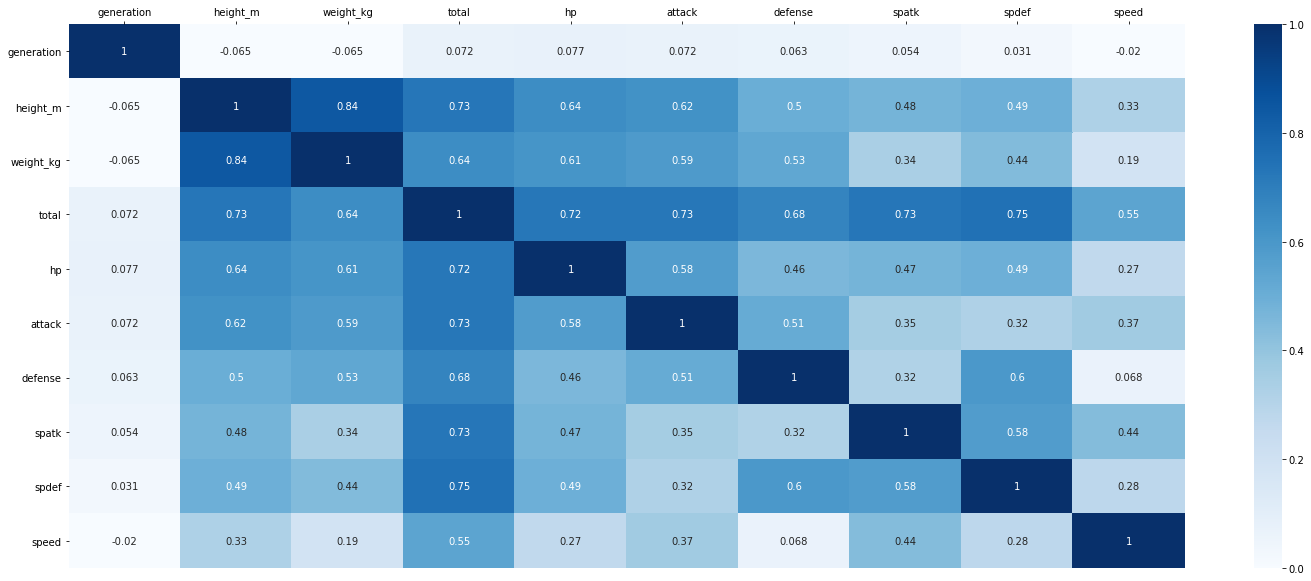

In [10]:
corrmat = dfPokemon.corr(method="spearman")
plt.figure(figsize=(25, 10))
sns.heatmap(
    corrmat, vmax=1, vmin=0, annot=True, cmap="Blues"
).xaxis.tick_top()

É interessante observar que em Spearman as correlações se mostraram mais fortes que no caso da correlação de Pearson. Isso ocorre porque os dados que estamos tratando não são dispostos de uma forma linear, o que prejudica o cálculo do coeficiente da correlação de Pearson. Dessa forma, o Spearman se mostrou mais efetivo.

Algumas correlações relevantes com certeza foram as esperadas para os stats dos Pokémons, pois `total` representa a soma de todos os stats `hp`, `attack`, `defense`, `spatk`, `spdef`, `speed`, então faz sentido ter uma correlação um tanto mais elevada.

A correlação não tão esperada e ampliada por Spearman, foi sobre a altura (`height_m`) e o peso (`weight_kg`) dos Pokémons. Mostrando uma certa tendência de quanto mais alto for o Pokémon mais pesado ele é.

In [11]:
!pip install plotly

In [12]:
fig = go.Figure()

# Definicao do layout
fig.update_layout(
    plot_bgcolor=transparente,
    font_color=cinza,
    autosize=True,
    height=550,
    margin=dict(l=0, r=0, t=25, b=0),
    title_text="Distribuição do Total e Médias dos stats por Tipo",
    paper_bgcolor=transparente,
    xaxis=dict(
        gridcolor=cinza,
        type="log",
        showspikes=True,
    ),
    yaxis=dict(
        gridcolor=cinza,
        type="log",
        showspikes=True,
    ),
)

for t in colorsType.keys():
    typeRows = dfPokemon.loc[:, "type1"] == t
    fig.add_trace(
        go.Scatter(
            x=dfPokemon.loc[typeRows, "weight_kg"],
            y=dfPokemon.loc[typeRows, "height_m"],
            name=t,
            mode="markers",
            customdata=dfPokemon.loc[typeRows, :],
            marker_color=dfPokemon.loc[typeRows, "type1"].map(
                colorsType
            ),
            hovertemplate=(
                "<b>%{customdata[0]} %{customdata[1]}</b><br>"
                + "%{text}"
                + "<extra>"
                + "Weight: %{x}kg<br>"
                + "Height: %{y}m<br>"
                + "Type 1: %{customdata[6]}<br>"
                # + "Type 2: %{customdata[7]}<br>"
                + "</extra>"
            ),
            # text=[
            #     "Forma " + str(x) + "<br>" if str(x) != "nan" else ""
            #     for x in dfPokemon.loc[typeRows, "form"].values
            # ],
            text=[
                "".join(
                    [
                        "Forma " + str(f) + "<br>"
                        if str(f) != "nan"
                        else "",
                        "Type 2: " + str(t) + "<br>"
                        if str(t) != "nan"
                        else "",
                    ]
                )
                for f, t in dfPokemon.loc[
                    typeRows, ["form", "type2"]
                ].values.tolist()
            ],
        )
    )

ploff.iplot(fig)

#### Distribuição <a name="dist"></a>

In [13]:
from scipy.stats import shapiro

sTotalGen = dfPokemon['total'].groupby(dfPokemon['generation'])
type(sTotalGen)
#stat, p = shapiro(sTotalGen)

# interpret
#alpha = 0.05
#if p > alpha:
#    msg = 'Sample looks Gaussian (fail to reject H0)'
#else:
#   msg = 'Sample does not look Gaussian (reject H0)'
#print(msg)

pandas.core.groupby.generic.SeriesGroupBy

0.001910654827952385


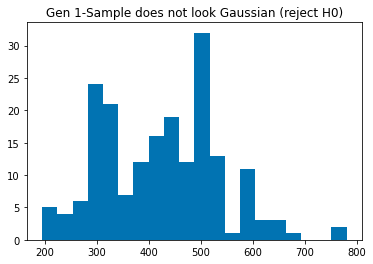

Gen 1-Sample does not look Gaussian (reject H0)
0.1258038580417633


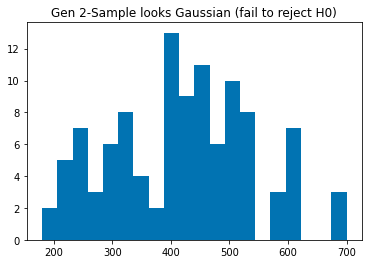

Gen 2-Sample looks Gaussian (fail to reject H0)
0.012480990961194038


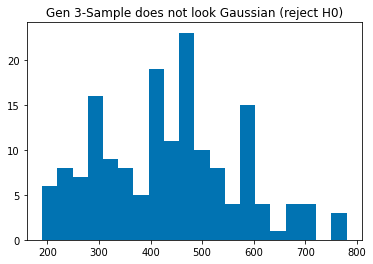

Gen 3-Sample does not look Gaussian (reject H0)
0.006740749813616276


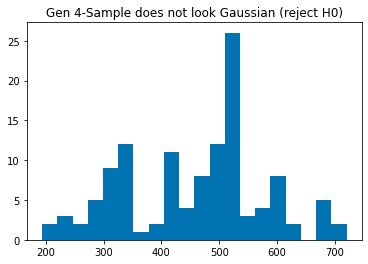

Gen 4-Sample does not look Gaussian (reject H0)
5.563786544371396e-06


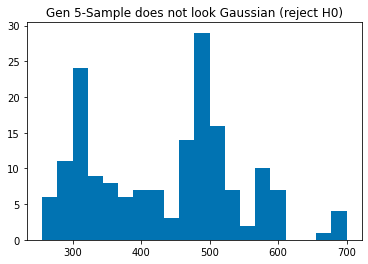

Gen 5-Sample does not look Gaussian (reject H0)
0.030353402718901634


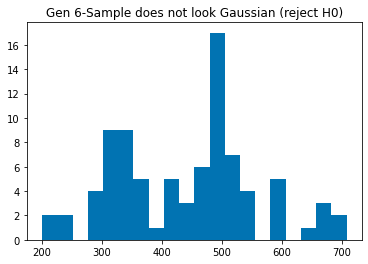

Gen 6-Sample does not look Gaussian (reject H0)
0.01379967387765646


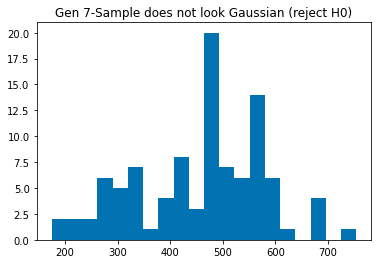

Gen 7-Sample does not look Gaussian (reject H0)
6.54980055969645e-07


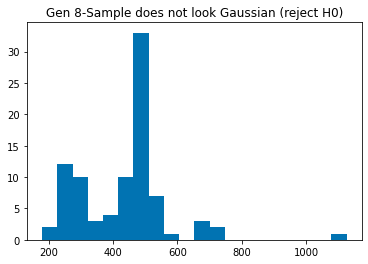

Gen 8-Sample does not look Gaussian (reject H0)


In [14]:
generations = dfPokemon["generation"].unique()
for generation in generations:
  filtred = dfPokemon[dfPokemon["generation"]==generation]
  # get numpy array
  data = filtred["total"].values
  stat, p = shapiro(data)
  
  # interpret
  alpha = 0.05
  print(p)
  if p > alpha:
      msg = 'Sample looks Gaussian (fail to reject H0)'
  else:
     msg = 'Sample does not look Gaussian (reject H0)'
  title = "Gen %s-%s"%(generation, msg)
  plt.title(title)
  plt.hist(data, bins=20)
  plt.show()
  print(title)

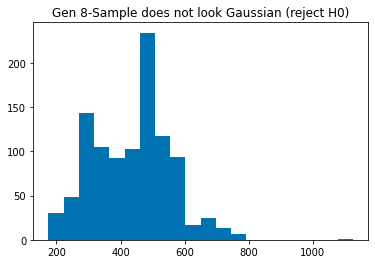

Gen 8-Sample does not look Gaussian (reject H0) 1.1363152606358451e-11


In [15]:
data = dfPokemon["total"].values
stat, p = shapiro(data)

# interpret
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = 'Sample does not look Gaussian (reject H0)'
title = "Gen %s-%s"%(generation, msg)
plt.title(title)
plt.hist(data, bins=20)
plt.show()
sP = str (p)
print(title + " " + sP)

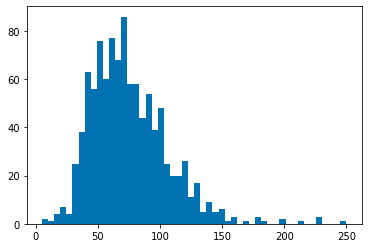

KstestResult(statistic=0.0, pvalue=1.0)

In [16]:
from scipy.stats import( kstest, poisson)

data = dfPokemon["defense"].values
#stat, p = shapiro(data)
#kstest(data,'poisson', args=(1,), alternative = 'less',N=10000)


plt.hist(data, bins=50)

plt.show()
kstest(data,'poisson', args=(1,), alternative = 'greater',N=data.shape[0])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b08bb4e10>,
      dtype=object)

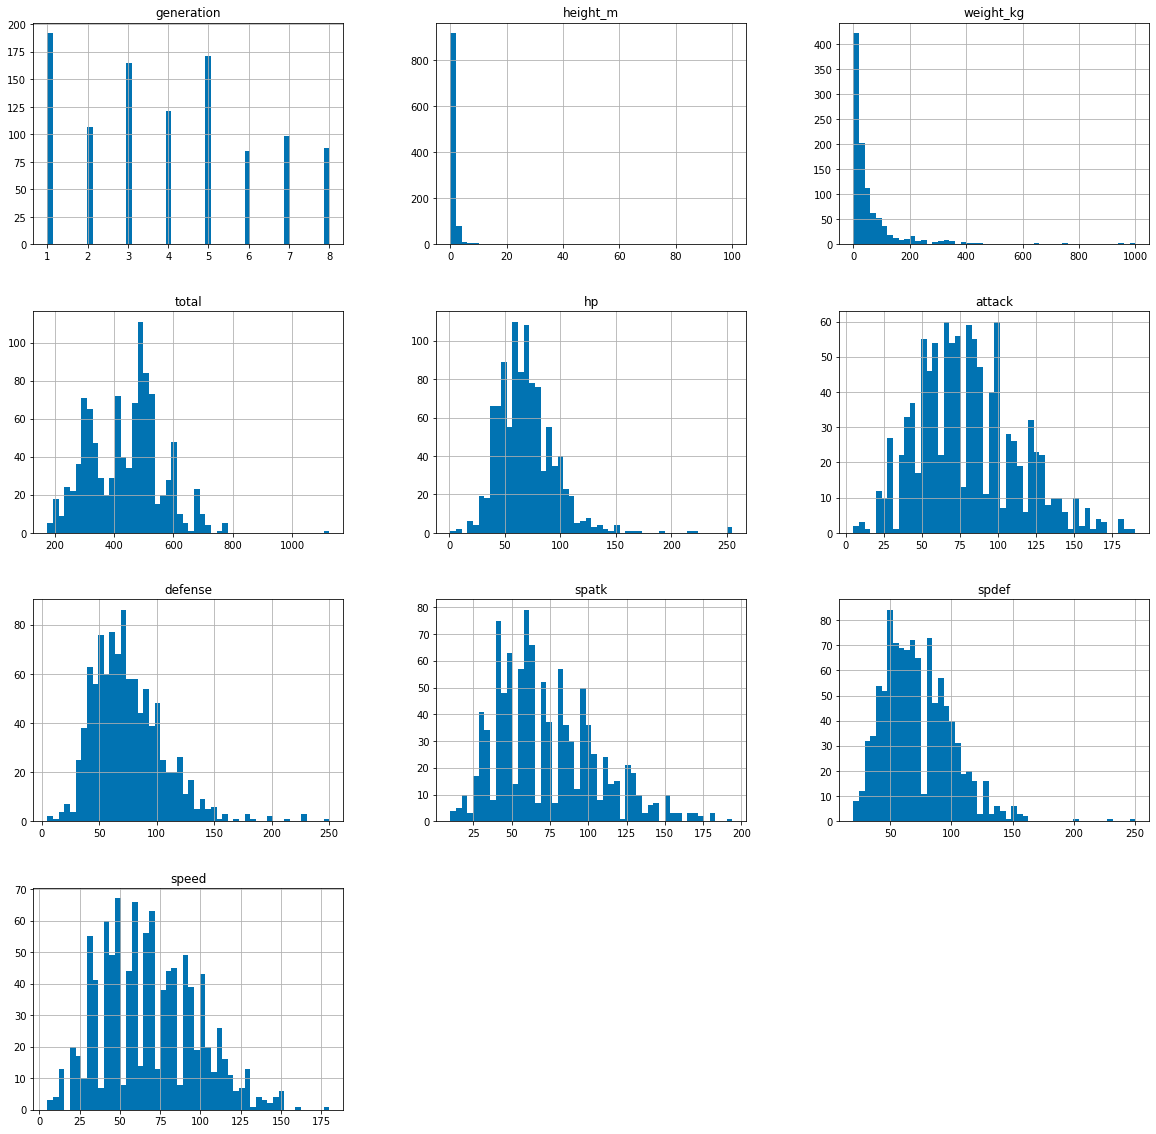

In [17]:
dfPokemon.hist(bins=50, figsize=(20, 20))

In [18]:
plt.figure(figsize=(20, 20))
# sns.pairplot(dfPokemon.loc[dfPokemon.loc[:, 'generation'] == 2, :],
sns.pairplot(
    dfPokemon,
    vars=[
        "total",
        "hp",
        "attack",
        "defense",
        "spatk",
        "spdef",
        "speed",
    ],
    hue="generation",
    palette="colorblind",
    kind="kde",
    corner=True,
    plot_kws={"levels": 3},
)  # 'fill': True,'alpha': .2

KeyboardInterrupt: ignored

<Figure size 1440x1440 with 0 Axes>

Error in callback <function flush_figures at 0x7f6b1816c048> (for post_execute):


KeyboardInterrupt: ignored

In [19]:
typesAcc = {i: None for i in range(0, 3)}

typesAcc[0] = dfPokemon.value_counts("type1", sort=True, ascending=True)
typesAcc[1] = dfPokemon.value_counts("type2", sort=True, ascending=True)
typesAcc[2] = typesAcc[0] + typesAcc[1]
typesAcc[2].sort_values(inplace=True)

typesAcc[0].name = "Type 1"
typesAcc[1].name = "Type 2"
typesAcc[2].name = "Type 1 + Type 2"


# Criacao dos subplots
fig = make_subplots(
    rows=1,
    cols=3,
    shared_xaxes="all",
    specs=[[{}, {}, {}]],
    subplot_titles=[typesAcc[i].name for i in range(0, 3)],
)

# Definicao do layout
fig.update_layout(
    font_color=cinza,
    autosize=True,
    height=550,
    margin=dict(l=0, r=0, t=50, b=0),
    title_text="Quantidade de Pokemons por tipo",
    paper_bgcolor=transparente,
    plot_bgcolor=transparente,
    showlegend=False,
)

for i in range(0, 3):
    fig.add_trace(
        go.Bar(
            x=typesAcc[i].values,
            y=typesAcc[i].keys(),
            name=typesAcc[i].name,
            orientation="h",
            marker=dict(
                color=typesAcc[i].keys().map(colorsType),
            ),
            text=typesAcc[i].values,
            textposition="inside",
            hovertemplate="%{y}: %{x}",
        ),
        row=1,
        col=i + 1,
    )
    fig.update_xaxes(
        title_text="Quantidade", gridcolor=cinza, row=1, col=i + 1
    )
    fig.update_yaxes(gridcolor=cinza, row=1, col=i + 1)

ploff.iplot(fig)

In [20]:
# Rank por type1 de médias dos valores da variavel total
totalMean = dfPokemon.loc[:, ["total", "type1"]].groupby("type1").mean()
totalMean.sort_values(by="total", inplace=True)

# Categorias que serao mostradas no radar
categories = ["hp", "spatk", "spdef", "attack", "defense", "speed"]

# Definicao do numero de linhas e colunas de graficos de radares
# Linhas * Colunas tem que totalizar 18 (total de tipos de pokemons)
rows = 2
cols = 9

# Definicao de um dicionario para o layout dos graficos polares
polarLayout = dict(
    bgcolor=transparente,
    radialaxis=dict(
        range=[30, 120],
        showticklabels=False,
        dtick=20,
        tickfont_size=9,
        linecolor=cinza,
        gridcolor=cinza,
        tickcolor=cinza,
    ),
    angularaxis=dict(
        rotation=60,
        direction="clockwise",
        showticklabels=False,
        tickfont_size=9,
        linecolor=cinza,
        tickcolor=cinza,
        gridcolor=cinza,
    ),
)

# Definicao da altura (proporcional) do grafico de violino
# 1 - violinHight sera aultura dividids entre as linhas de radares
violinHight = 0.6
heights = [(1 - violinHight) / rows] * (rows + 1)
heights[0] = violinHight

# Definicao do tipo do grafico de cada subplot
# A primeira linha sera um unico grafico de violino
row1 = [None] * cols
row1[0] = {"colspan": cols, "type": "xy"}
specsC = [row1]
# Todos da segunda linha serao graficos polares
rowsRadars = [{"type": "polar"}] * cols
specsC += [rowsRadars] * rows

# Criacao dos subplots
fig = make_subplots(
    rows=rows + 1,
    cols=cols,
    shared_xaxes="all",
    shared_yaxes="all",
    vertical_spacing=0,
    horizontal_spacing=0,
    row_heights=heights,
    specs=specsC,
)

for i, t in enumerate(totalMean.index):
    typeRows = dfPokemon.loc[:, "type1"] == t

    # Plot dos graficos de violino
    fig.add_trace(
        go.Violin(
            x=dfPokemon.loc[typeRows, "type1"],
            y=dfPokemon.loc[typeRows, "total"],
            name=t,
            legendgroup=t,
            scalegroup=t,
            box_visible=True,
            meanline_visible=True,
            points="outliers",
            line_color=colorsType[t],
        ),
        row=1,
        col=1,
    )

    # Plot dos graficos de radar
    fig.add_trace(
        go.Scatterpolar(
            r=dfPokemon.loc[typeRows, categories].mean(),
            theta=categories,
            fill="toself",
            name=t,
            line_color=colorsType[t],
            legendgroup=t,
            showlegend=False,
            hovertemplate="mean %{theta}: %{r:.2f}",
        ),
        row=(i // cols) + 2,
        col=(i % cols) + 1,
    )
    # Layout dos graficos de radar
    fig.update_layout(
        # Essa expressao se traduz em {polar+str(i): polarLayout}
        **{["polar" + str(x) for x in range(1, 19)][i]: polarLayout}
    )


fig.update_layout(
    
    # Layout do grafico como um todo
    font_color=cinza,
    autosize=True,
    height=600,
    margin=dict(l=0, r=0, t=25, b=0),
    title_text="Distribuição do Total e Médias dos stats por Tipo",
    paper_bgcolor=transparente,
    
    # Layout do grafico de violino
    plot_bgcolor=transparente,
    xaxis=dict(ticks="", showticklabels=False),
    yaxis=dict(title="Total", gridcolor=cinza),
    violingap=0.1,
    violingroupgap=0.1,
    
    # Colocando os eixos no primeiro radar
    polar1=dict(
        radialaxis=dict(showticklabels=True),
        angularaxis=dict(showticklabels=True),
    )
    
)

ploff.iplot(fig)

In [23]:
fig = go.Figure()

for t in colorsType.keys():
    if t == "NaN":
        pass
    fig.add_trace(
        go.Scatterpolar(
            r=dfPokemon.loc[
                dfPokemon.loc[:, "type1"] == t, categories
            ].mean(),
            theta=categories,
            fill="none",
            name=t,
            line_color=colorsType[t],
            hovertemplate="mean %{theta}: %{r:.2f}",
        )
    )

fig.update_layout(
    font_color=cinza,
    autosize=True,
    height=500,
    margin=dict(l=0, r=0, t=25, b=0),
    title_text="Médias dos stats por Tipo",
    paper_bgcolor=transparente,
    polar=dict(
        bgcolor=transparente,
        radialaxis=dict(
            range=[40, 120],
            linecolor=cinza,
            gridcolor=cinza,
            tickcolor=cinza,
        ),
        angularaxis=dict(
            rotation=120,
            direction="clockwise",
            linecolor=cinza,
            tickcolor=cinza,
            gridcolor=cinza,
        ),
    ),
)

ploff.iplot(fig)

#### Wordcloud <a name="wordcloud"></a>

In [21]:
!pip install multidict
!pip install wordcloud

     |████████████████████████████████| 143kB 4.8MB/s 


890


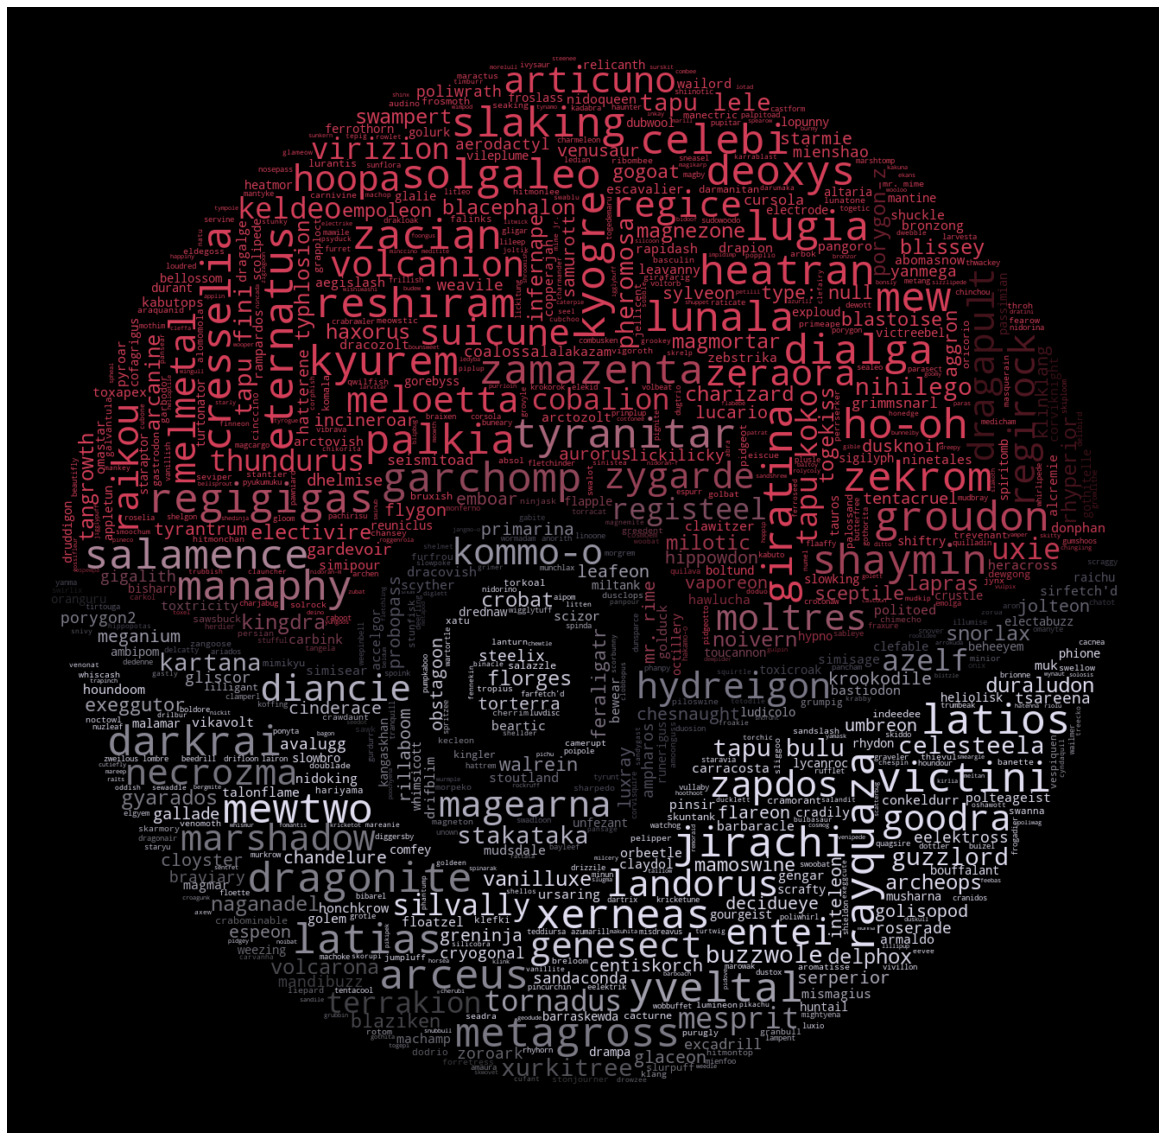

In [22]:
import multidict
import requests
import random

from scipy.ndimage import gaussian_gradient_magnitude
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from io import BytesIO


df = dfPokemon
# acho q deviamos explicitar qual pokemon fica, baseado no total:
# ordenar decrescente pelo total e deixar o ultimo (maior) por exemplo
# df.sort_values(["name", "total"], ascending=[True, False]).drop_duplicates("name", keep='last', inplace=True).reset_index(drop=True)
# ao inves de:
df = df.drop_duplicates("name")

comment_words = ""


def getFrequencyDictForText():
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for val in df.name:
        tmpDict[val.lower()] = df.loc[df["name"] == val].total.item()
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict


# got from
# https://webstockreview.net/images/pokeball-clipart-pokemon-free.png
response = requests.get(
    "https://raw.githubusercontent.com/brenoslivio/SCC0652_Computationa"
    + "l_Visualization/master/notebooks/Project-2/image/pokeball.png",
)
img = Image.open(BytesIO(response.content))

pokeball_color = np.array(img)

pokeball_color = pokeball_color[::3, ::3]

# create mask  white is "masked out"
pokeball_mask = pokeball_color.copy()
pokeball_mask[pokeball_mask.sum(axis=2) == 0] = 255

# some finesse: we enforce boundaries between colors so they get less
# washed out. For that we do some edge detection in the image
edges = np.mean(
    [
        gaussian_gradient_magnitude(pokeball_color[:, :, i] / 255.0, 2)
        for i in range(3)
    ],
    axis=0,
)
pokeball_mask[edges > 0.08] = 255


wordcloud = WordCloud(
    max_words=2000,
    background_color="black",
    mask=pokeball_mask,
    max_font_size=48,
    relative_scaling=0,
)

pokemonDict = getFrequencyDictForText()

wordcloud.generate_from_frequencies(pokemonDict)

print(len(pokemonDict))

image_colors = ImageColorGenerator(pokeball_color)

# plot the WordCloud image
plt.figure(figsize=(16, 16))
plt.imshow(
    wordcloud.recolor(color_func=image_colors), interpolation="bilinear"
)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

## Conclusão sobre as visualizações feitas <a name="conclusao"></a>